## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [1]:
# lee los datos en un DataFrame

# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

import pandas as pd
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


For convenience, we'll further process this dataset by shortening the column names:

In [2]:
# que las columnas se llamen 'Total','East', 'West'
data.columns = ['Total', 'East', 'West']

Now let's take a look at the summary statistics for this data:

In [3]:
data.dropna().describe()

,Total,East,West
count,90538.000000,90538.000000,90538.000000
mean,105.941837,47.374892,58.566944
std,133.581904,60.933511,82.815485
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,142.000000,65.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import pandas.util.testing as tm

C:\Users\Admin\AppData\Local\Temp/ipykernel_26216/3104561400.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


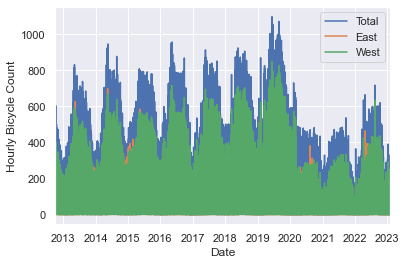

In [5]:
# haz un plot
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by month:

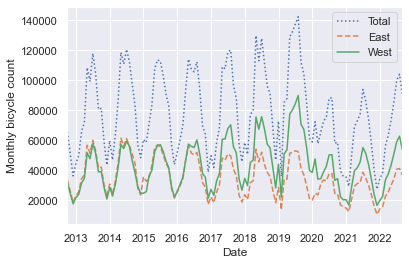

In [6]:
# muestrea por mes y en ese periodo calcula la suma
# pinta ese cálculo con puntos suspensivos para el total, rayado para el este y 
# con línea continua para el oeste

monthly = data.resample('M').sum()
monthly.plot(style=[':', '--', '-'])
plt.ylabel('Monthly bicycle count');

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) where we explore this further).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

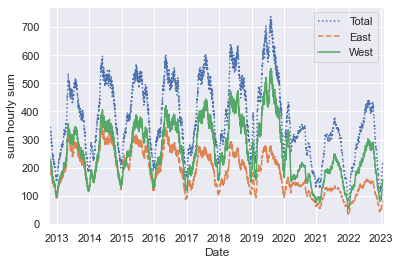

In [8]:
# haz una ventana deslizante de 30 días, calcula la suma y asóciala al centro de la ventana
daily = data.resample('D').max()
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'])
plt.ylabel('sum hourly sum');

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

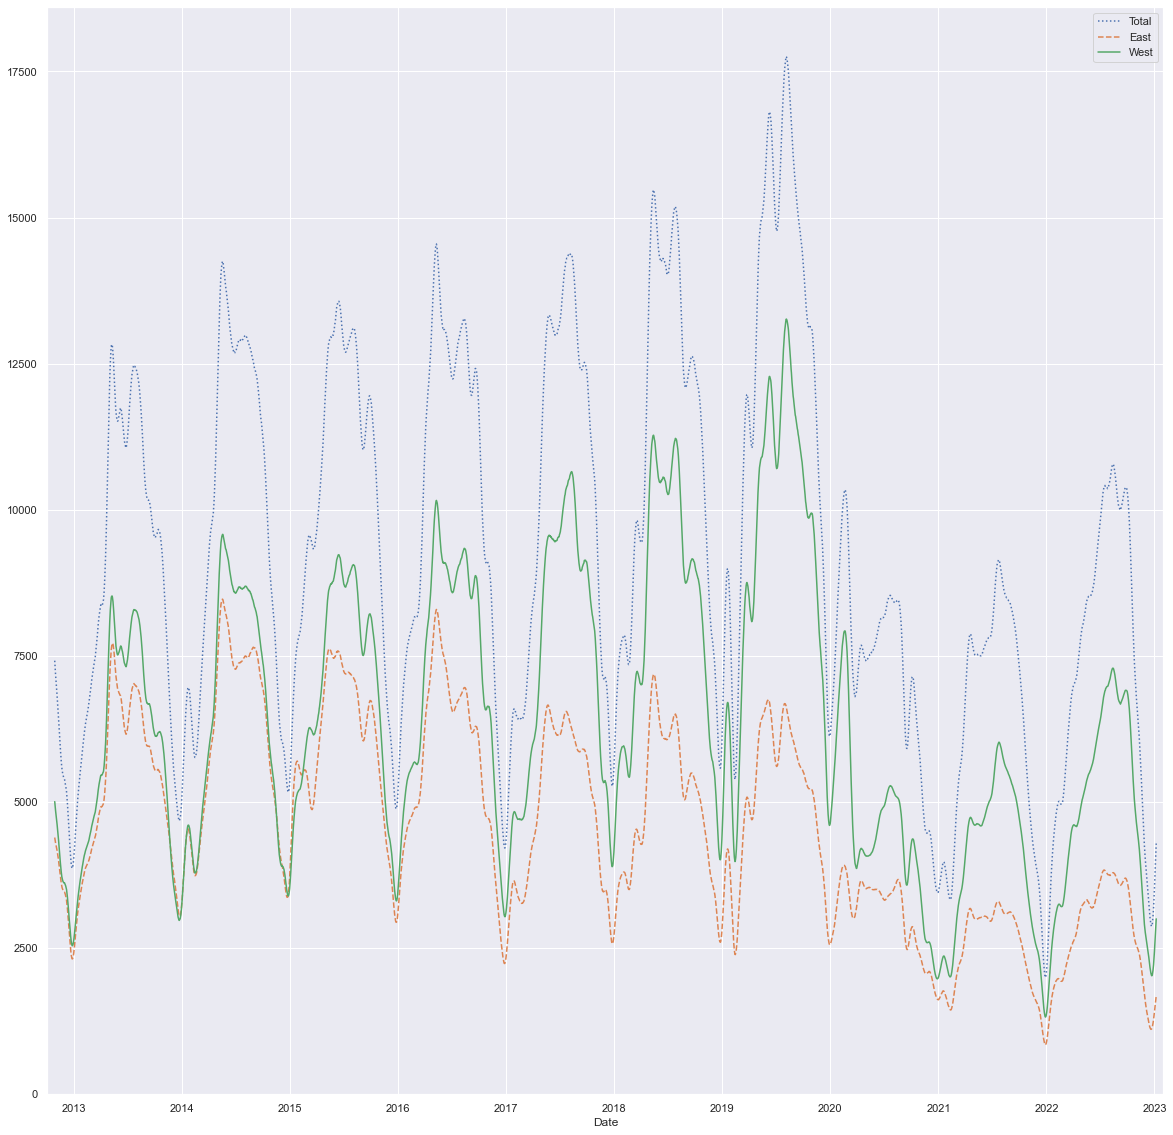

In [21]:
# usa ahora una ventana deslizante gaussiana de 50 días para suavizar más

daily.rolling(50, center = True,
             win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'], figsize = (20,20)); 


### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

In [7]:
# agrupamos por horas y calculamos la agregación (media) calculada entre todos los días
data.groupby(data.index.time).mean()

,Total,East,West
00:00:00,10.471233,4.347123,6.124110
01:00:00,5.516712,2.414795,3.101918
02:00:00,3.609890,1.702198,1.907692
03:00:00,2.675342,1.335068,1.340274
04:00:00,6.250411,3.119726,3.130685
05:00:00,23.601644,13.752603,9.849041
06:00:00,81.357534,46.738904,34.618630
07:00:00,200.918904,120.112603,80.806301
08:00:00,283.143836,160.903562,122.240274
09:00:00,171.452727,89.241984,82.210743


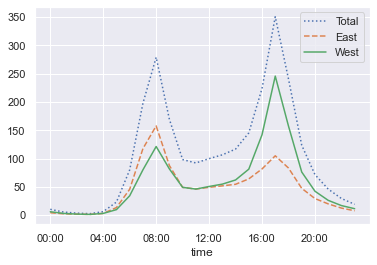

In [22]:
# mirando solo en las horas del día
# investiga qué sucede con el tráfico de bicicletas
import numpy as np
by_time = data.groupby(data.index.time).mean()

hourly_ticks = 4 * 60 * 60 * np.arange(6) # saltos de 4 horas, 6 puntos diferentes
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

In [23]:
# son las horas (time)
data.index.time # son las horas (time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

           Total       East       West
Date                                  
0     119.098794  51.980674  67.118120
1     129.048168  56.296196  72.751972
2     128.755179  56.234926  72.520254
3     121.982297  53.608302  68.373995
4     110.330602  48.720504  61.610097
5      68.185142  33.043986  35.141156
6      64.164629  31.729151  32.435479
            Total       East       West
Mon    119.098794  51.980674  67.118120
Tues   129.048168  56.296196  72.751972
Wed    128.755179  56.234926  72.520254
Thurs  121.982297  53.608302  68.373995
Fri    110.330602  48.720504  61.610097
Sat     68.185142  33.043986  35.141156
Sun     64.164629  31.729151  32.435479


<AxesSubplot:>

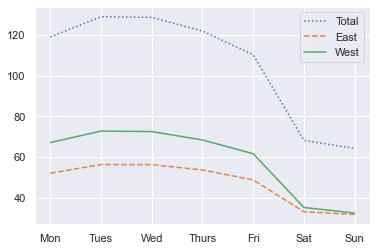

In [24]:
# agrupa ahora por día de la semana y calcula la media
by_weekday = data.groupby(data.index.dayofweek).mean()

print(by_weekday)
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
print(by_weekday)
by_weekday.plot(style=[':', '--', '-'])


This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [25]:
# investiga cómo se comprota el tráfico de biciletas según el día sea fin de semana o no y la hora
# investiga cómo se comprota el tráfico de biciletas según el día sea fin de semana o no y la hora
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
weekend[70:75]

array(['Weekday', 'Weekday', 'Weekend', 'Weekend', 'Weekend'], dtype='<U7')

In [26]:
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

Total        East        West
Weekday 00:00:00    8.480148    3.558071    4.922078
        01:00:00    4.197032    1.847124    2.349907
        02:00:00    2.790353    1.351763    1.438590
        03:00:00    2.405195    1.215584    1.189610
        04:00:00    7.256030    3.735065    3.520965
        05:00:00   29.712059   17.404453   12.307607
        06:00:00  105.422263   61.107607   44.314657
        07:00:00  264.057885  158.375510  105.682375
        08:00:00  366.975510  208.894249  158.081262
        09:00:00  203.763549  106.001856   97.761693
        10:00:00   95.514477   47.413140   48.101336
        11:00:00   77.594655   38.790275   38.804380
        12:00:00   82.395323   40.250557   42.144766
        13:00:00   88.530612   42.306122   46.224490
        14:00:00  100.726531   45.255659   55.470872
        15:00:00  142.065677   59.178479   82.887199
        16:00:00  257.565121   86.946939  170.618182
        17:00:00  445.457514  124.793692  320.663822
        18:00:00  302.145455   99.709833  202.435622
        19:00:00  148.597032   54.972171   93.624861
        20:00:00   83.530983   33.292022   50.238961
        21:00:00   52.115399   22.521336   29.594063
        22:00:00   32.604453   13.725417   18.879035
        23:00:00   20.321707    8.196289   12.125417
Weekend 00:00:00   15.004638    6.133581    8.871058
        01:00:00    8.621521    3.760668    4.860853
        02:00:00    5.543071    2.520599    3.022472
        03:00:00    3.192022    1.556586    1.635436
        04:00:00    3.512987    1.420223    2.092764
        05:00:00    7.009276    3.554731    3.454545
        06:00:00   16.718924    7.525974    9.192950
        07:00:00   31.970315   15.703154   16.267161
        08:00:00   59.352505   29.858071   29.494434
        09:00:00   83.451763   41.816327   41.635436
        10:00:00  105.047310   53.228200   51.819109
        11:00:00  128.932282   64.625232   64.307050
        12:00:00  143.764378   71.732839   72.031540
        13:00:00  151.869202   75.522263   76.346939
        14:00:00  156.846011   77.810761   79.035250
        15:00:00  153.786642   76.479592   77.307050
        16:00:00  139.600186   68.645640   70.954545
        17:00:00  113.899814   55.291280   58.608534
        18:00:00   87.212430   42.282004   44.930427
        19:00:00   61.320037   28.490724   32.829314
        20:00:00   42.031540   19.509276   22.522263
        21:00:00   31.127087   13.434137   17.692950
        22:00:00   21.492579    9.416512   12.076067
        23:00:00   16.346939    6.688312    9.658627

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

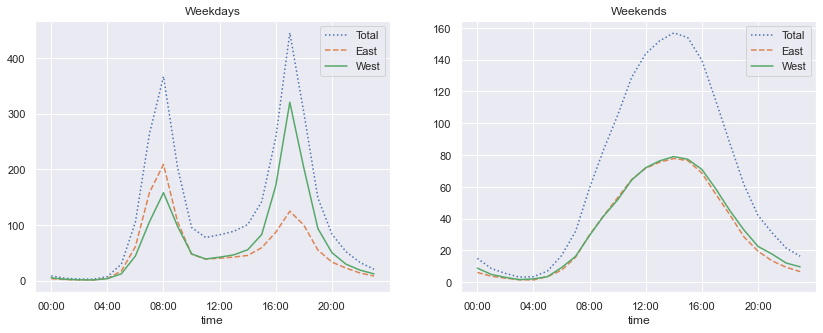

In [28]:
# pinta gráficas para ver el resultado más claro
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks = hourly_ticks, style=[':', '--', '-']);


The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).